In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [6]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [7]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_vx_vs_vy', 'sel_vtx_phi_vs_METphi', 'PVx_vs_PVy', 'PFMET', 'PFMET1000', 'PFMETphi', 'jetMETdPhi', 'minJetMETdPhi', 'nJets', 'lead_jet_pt', 'lead_jet_eta', 'jetMETratio', 'PVx', 'PVy', 'cutDesc', 'cutflow', 'c

## Signal

In [8]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [9]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections', 'n(good vertex) > 0', 'No b-tagged jets']

In [10]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [11]:
table = eff_cutflow
table.columns = cutnames

In [12]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Efficiency_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


In [13]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [14]:
table = cts_cutflow
table.columns = cutnames

In [15]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.3947,38.3978,32.7525
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,164.1743",997.3225,860.9083
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,466.2272","1,250.6721","1,080.7752"
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,75.1374,65.0925,55.8034
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,976.3460","1,672.2548","1,426.6687"
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,742.8429","2,296.0578","1,981.4154"
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,632.8390","1,231.9799","1,055.2759"
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,995.1698","25,298.0115","21,832.5300"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,168.2571,147.3215,124.8514
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,212.7201","3,506.9900","3,024.9706"


In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_EventCount_Weighted_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


In [17]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [18]:
table = raw_cutflow
table.columns = cutnames

In [19]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,28531,24677,21049
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,36636,31385,27092
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12401,10578,9141
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,12044,10434,8945
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,10969,9281,7918
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,9197,7699,6644
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,2578,1945,1666
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1923,1431,1235
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,651,570,483
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,8853,7370,6357


In [20]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Raw_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p1_ct_1_m5to40.png


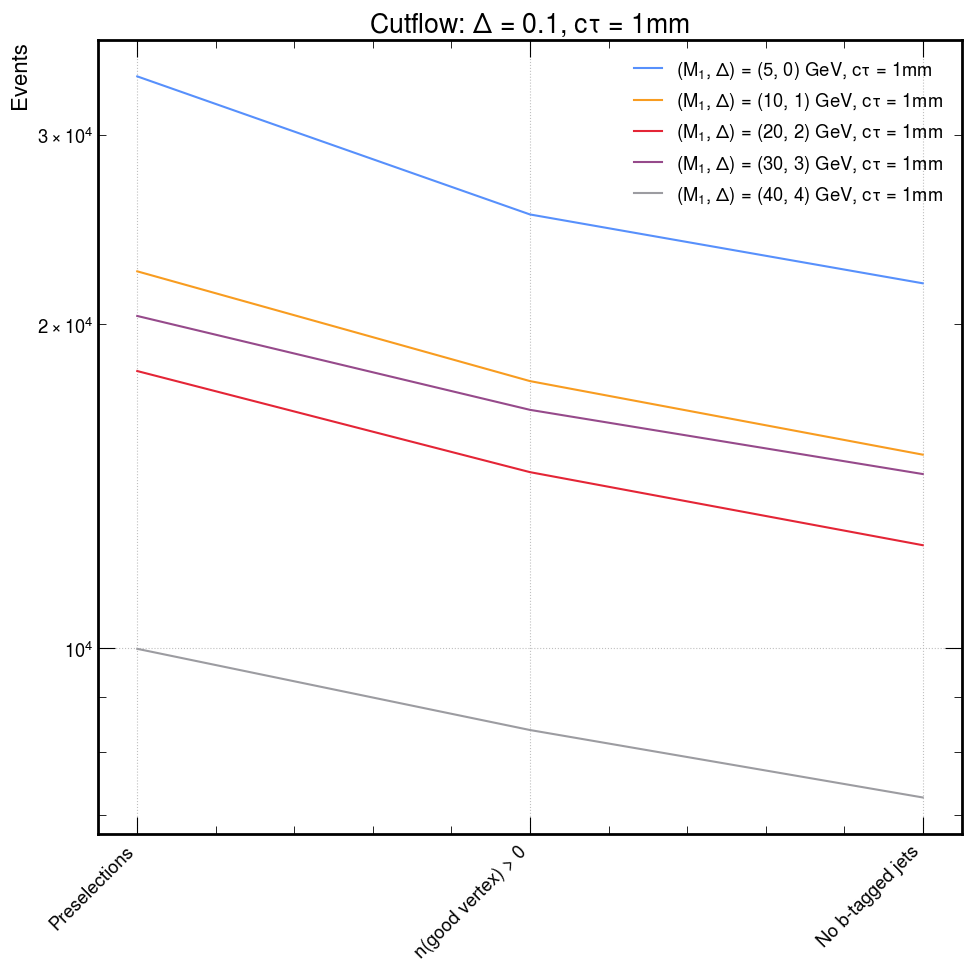

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p1_ct_10_m5to40.png


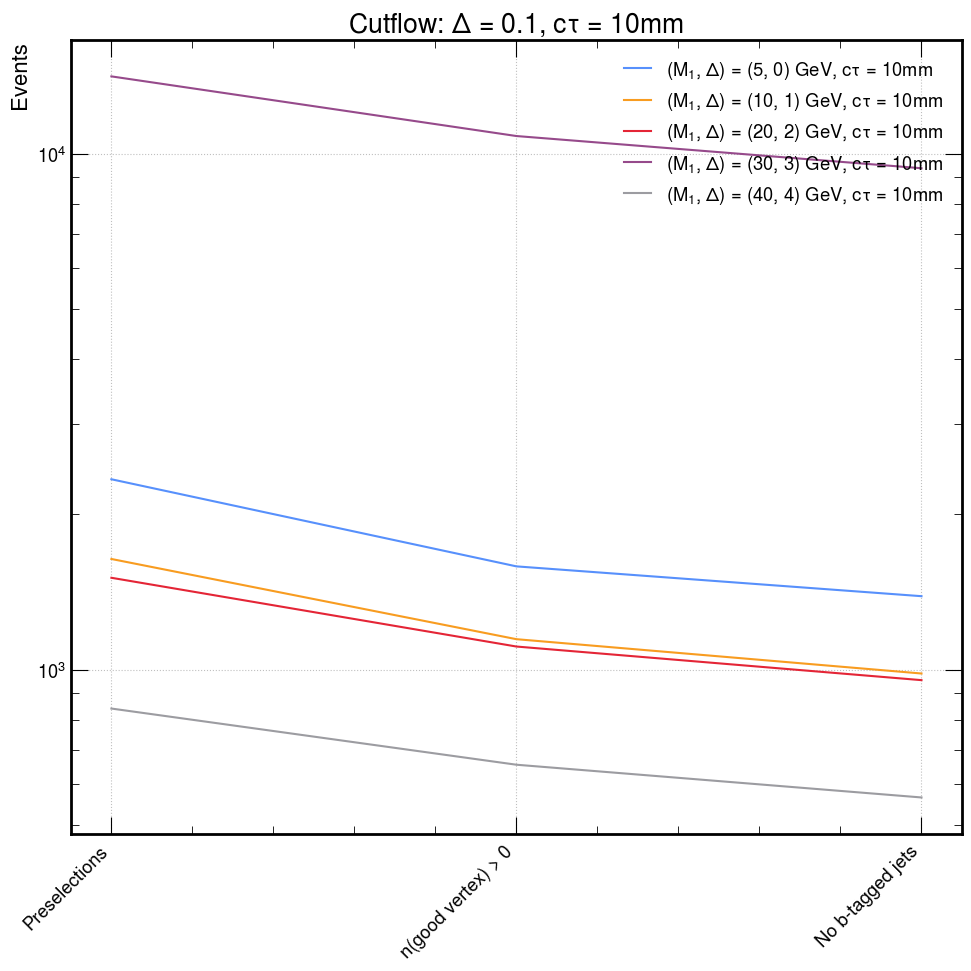

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p1_ct_100_m5to40.png


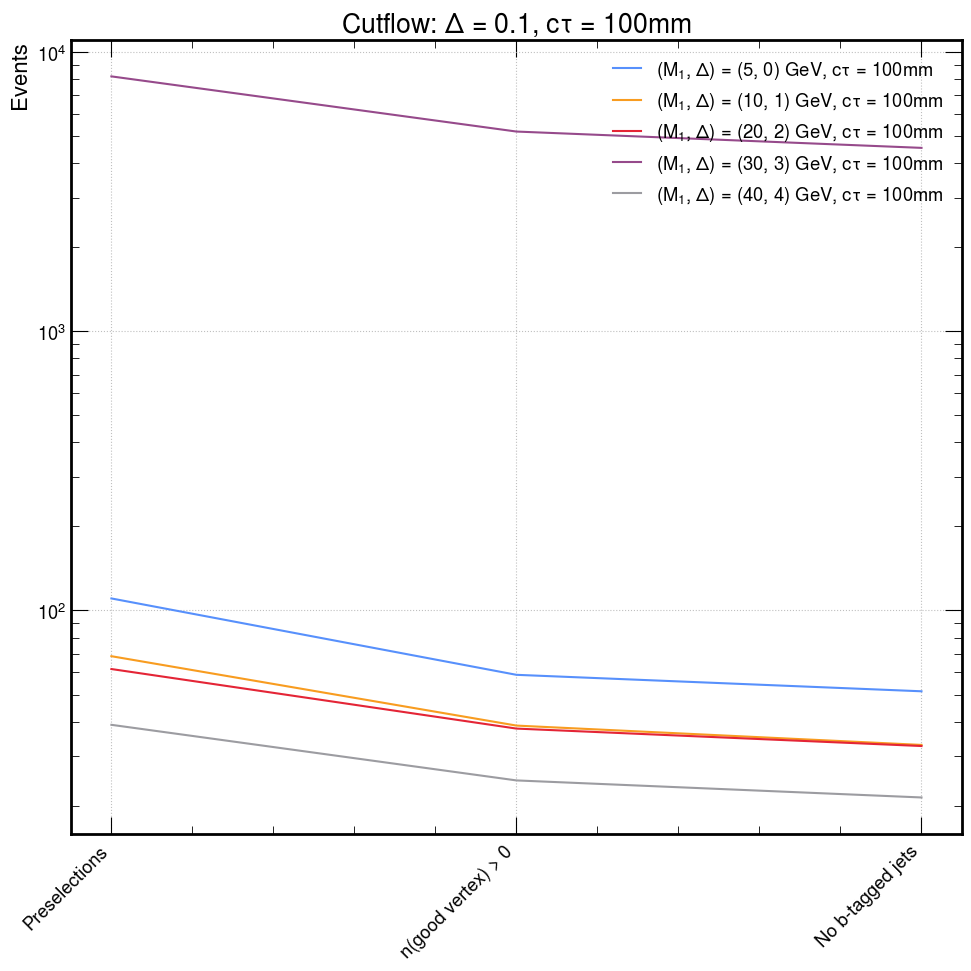

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p2_ct_1_m5to40.png


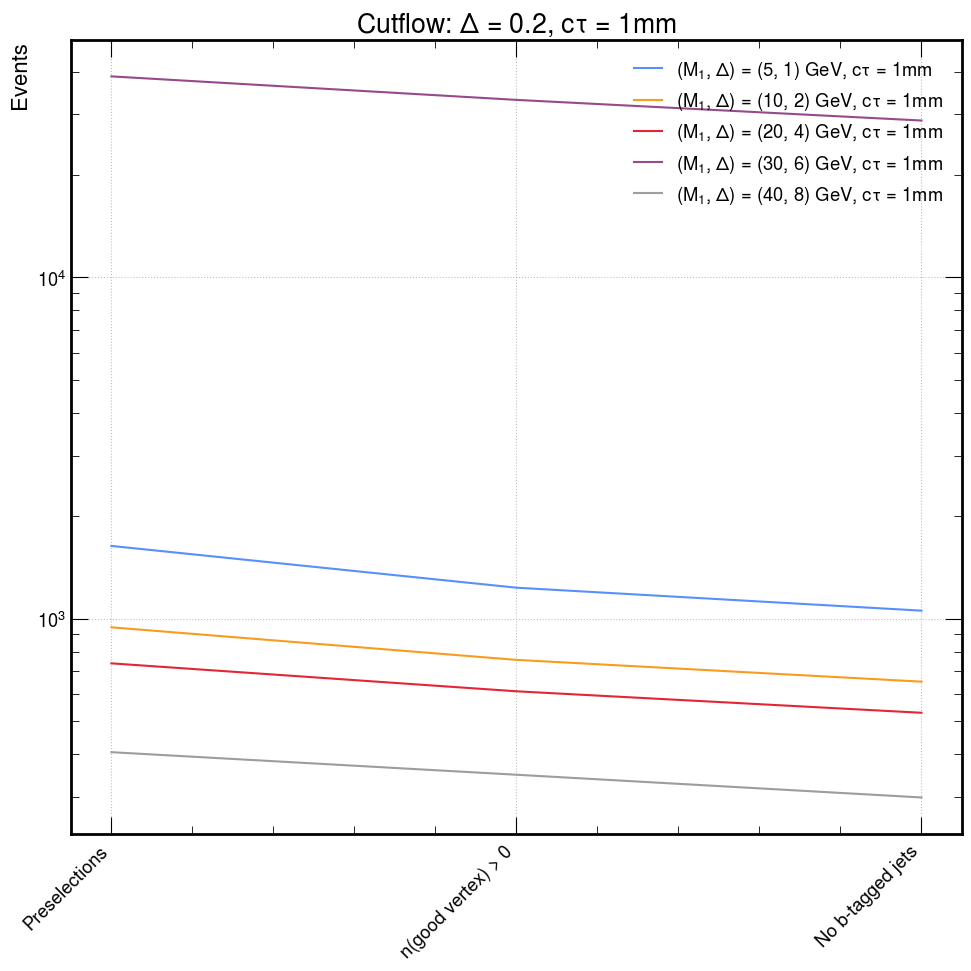

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p2_ct_10_m5to40.png


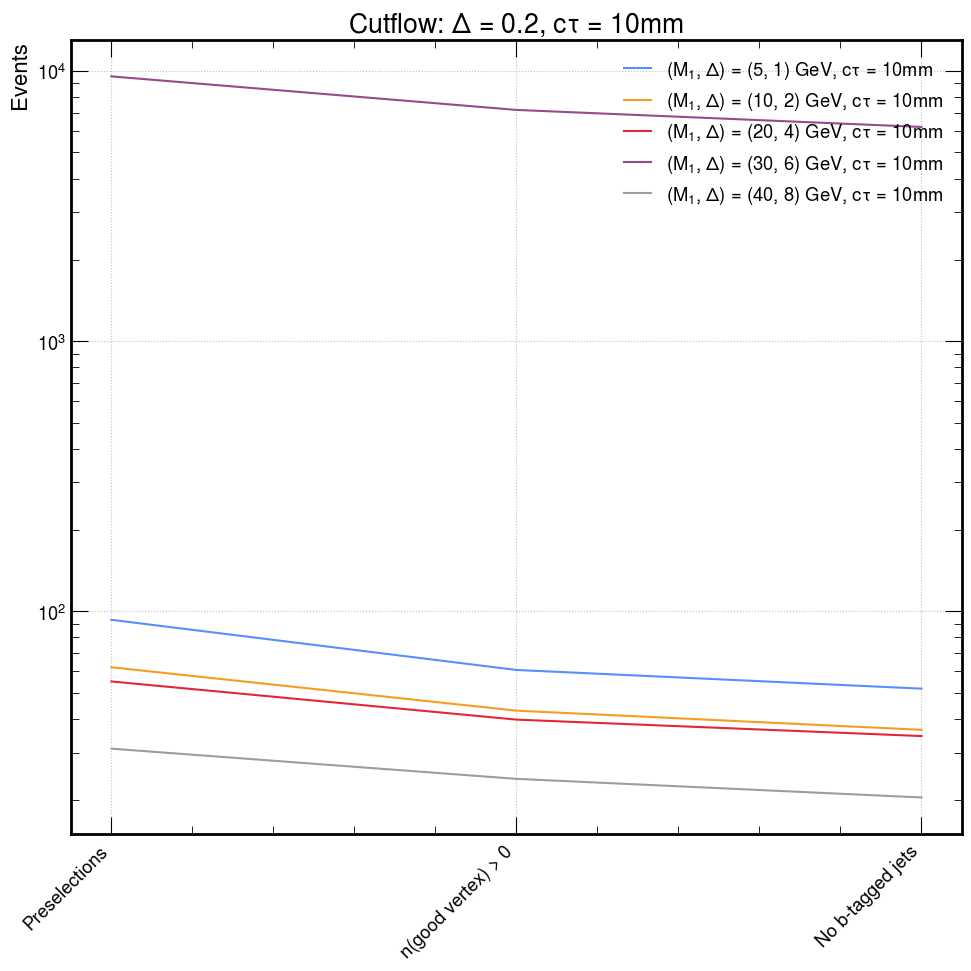

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p2_ct_100_m5to40.png


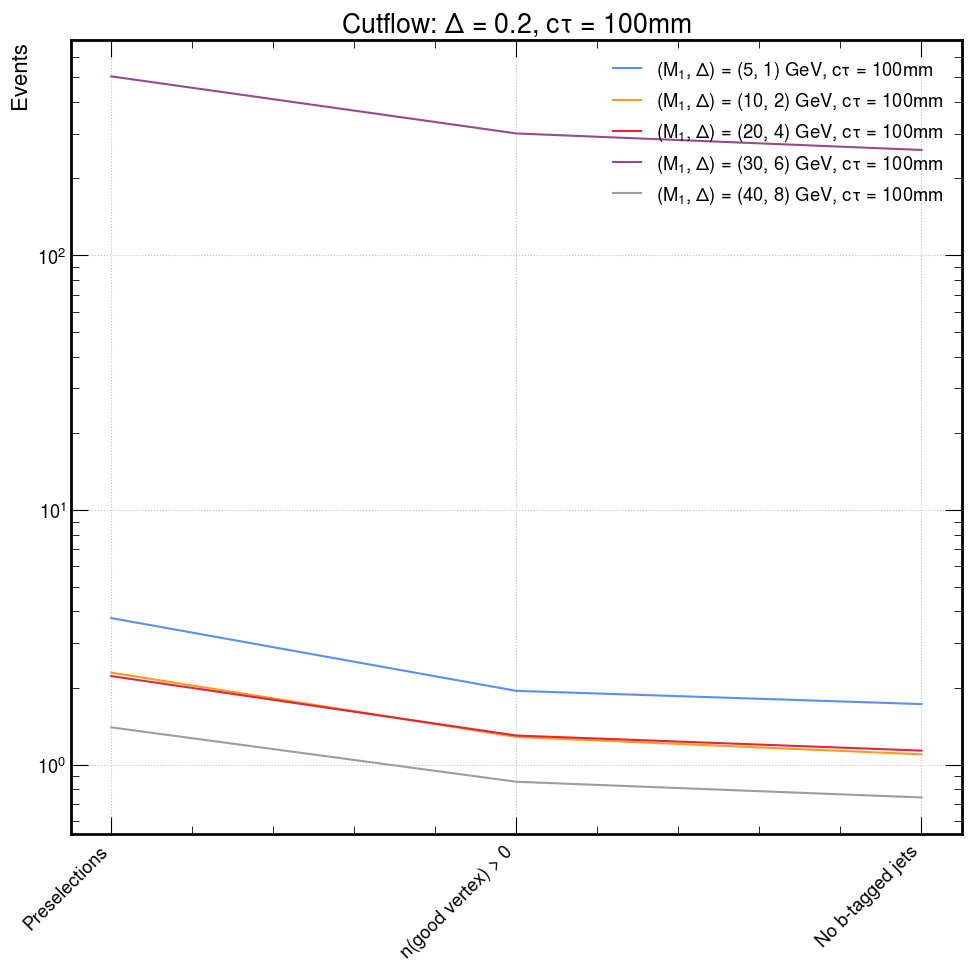

In [21]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p1_ct_1_m50to100.png


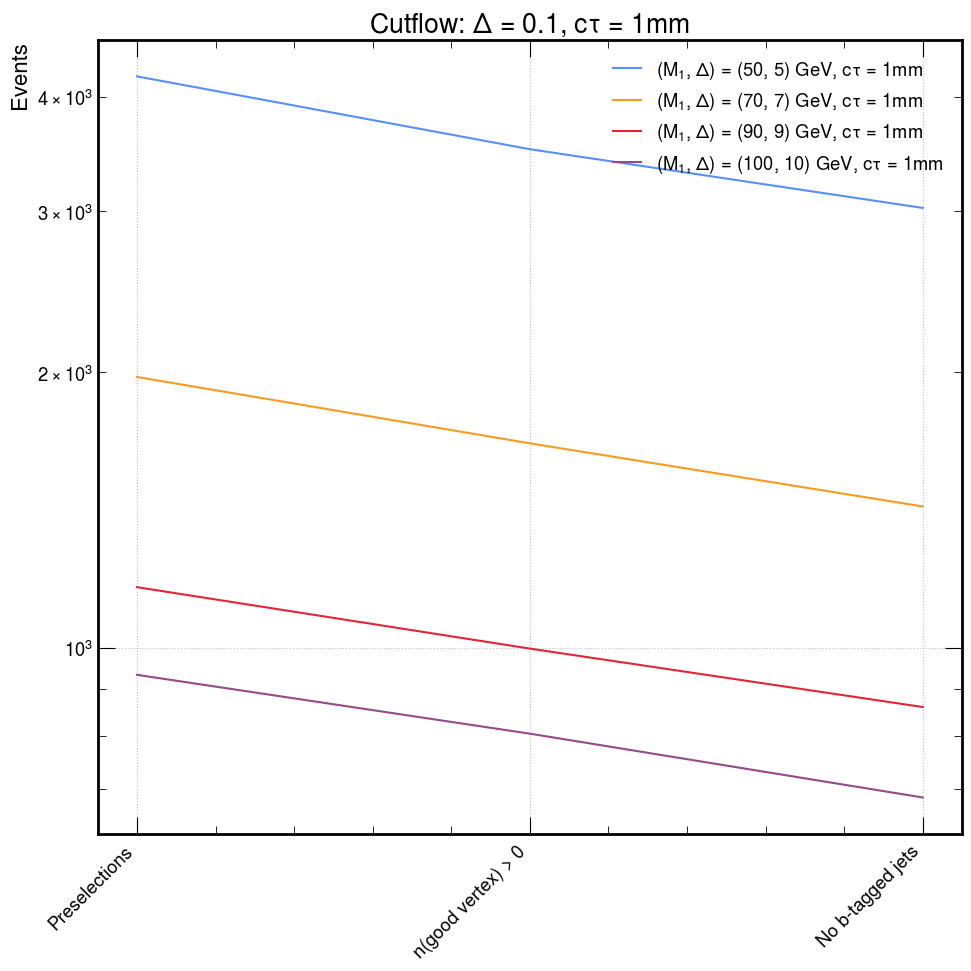

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p1_ct_10_m50to100.png


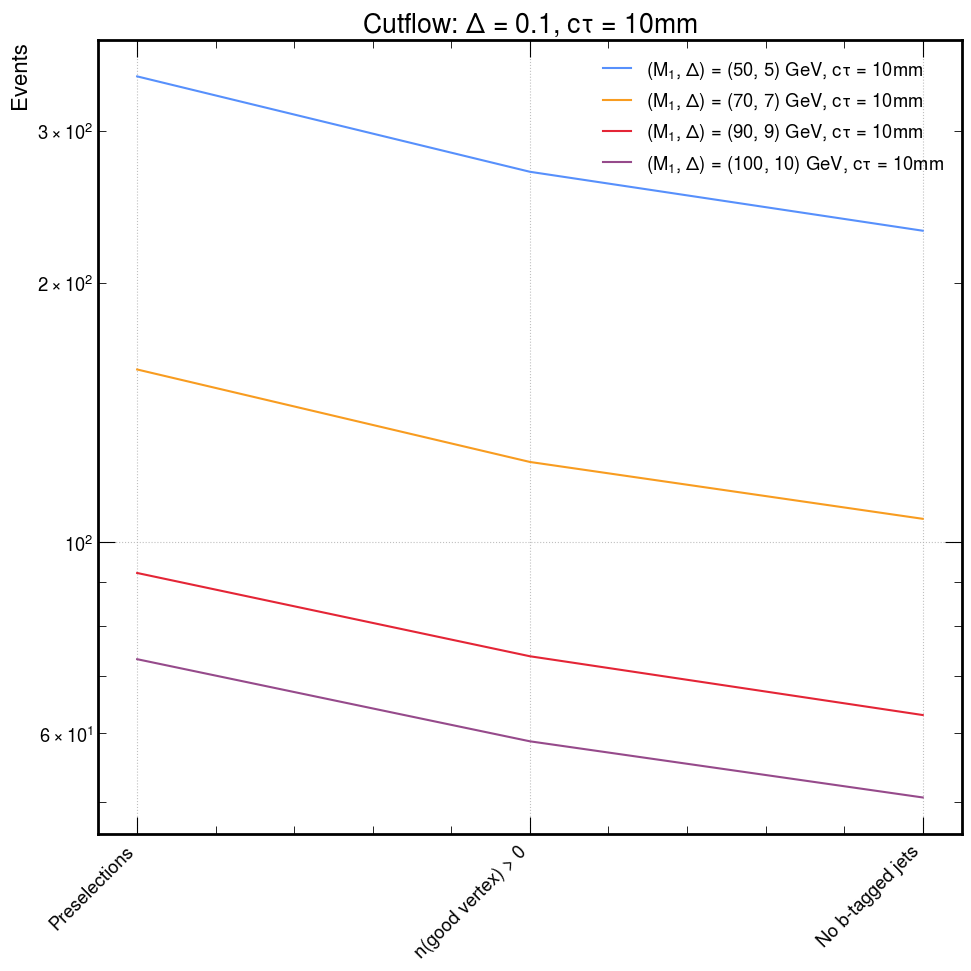

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p1_ct_100_m50to100.png


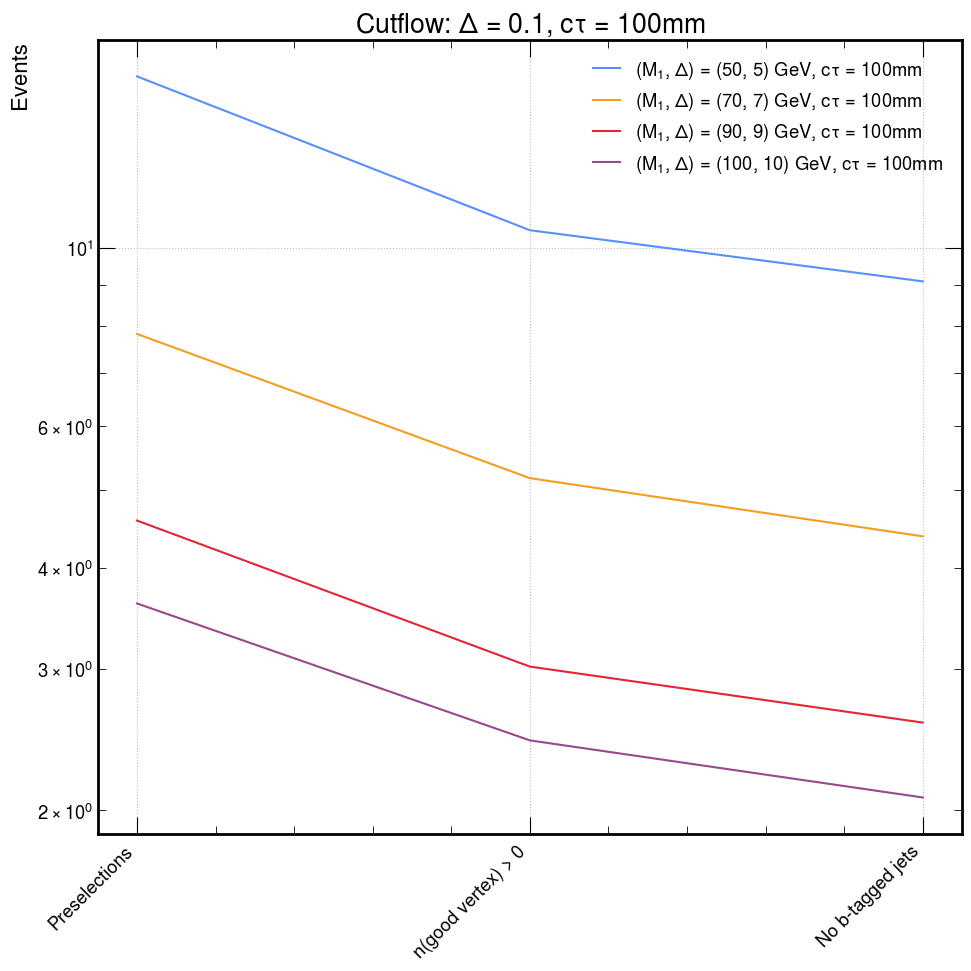

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p2_ct_1_m50to100.png


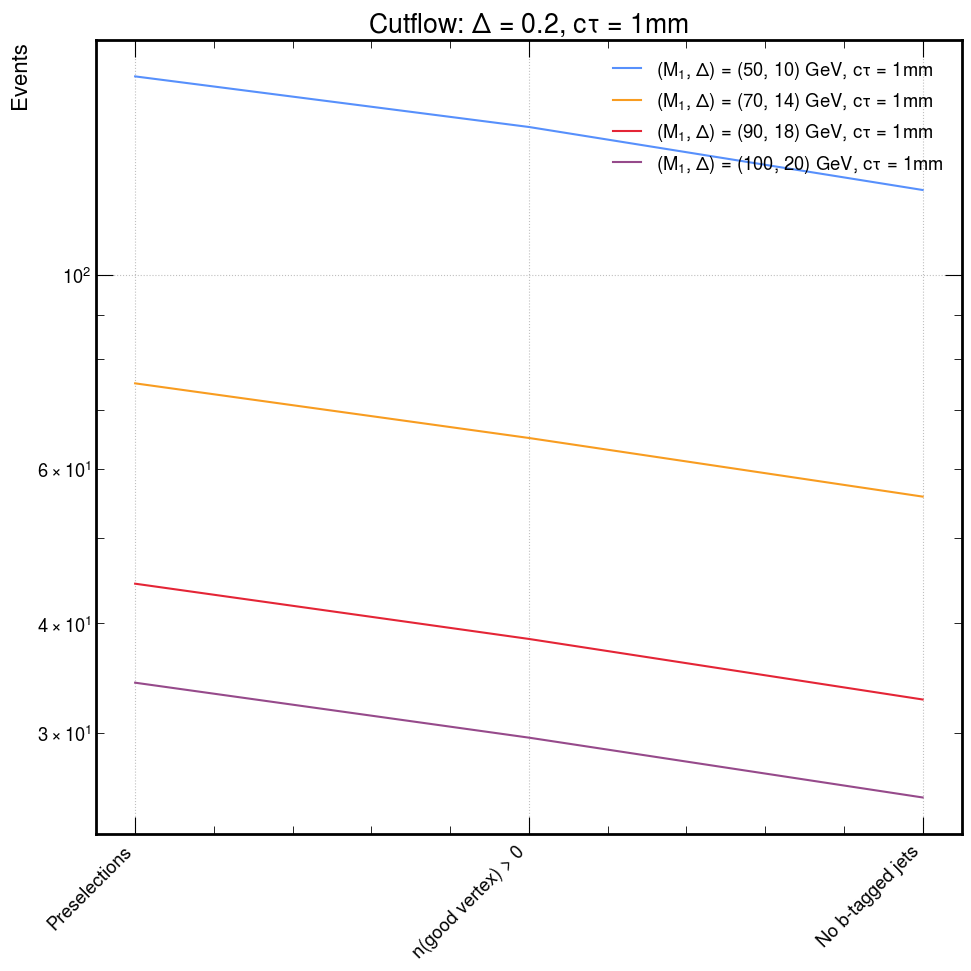

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p2_ct_10_m50to100.png


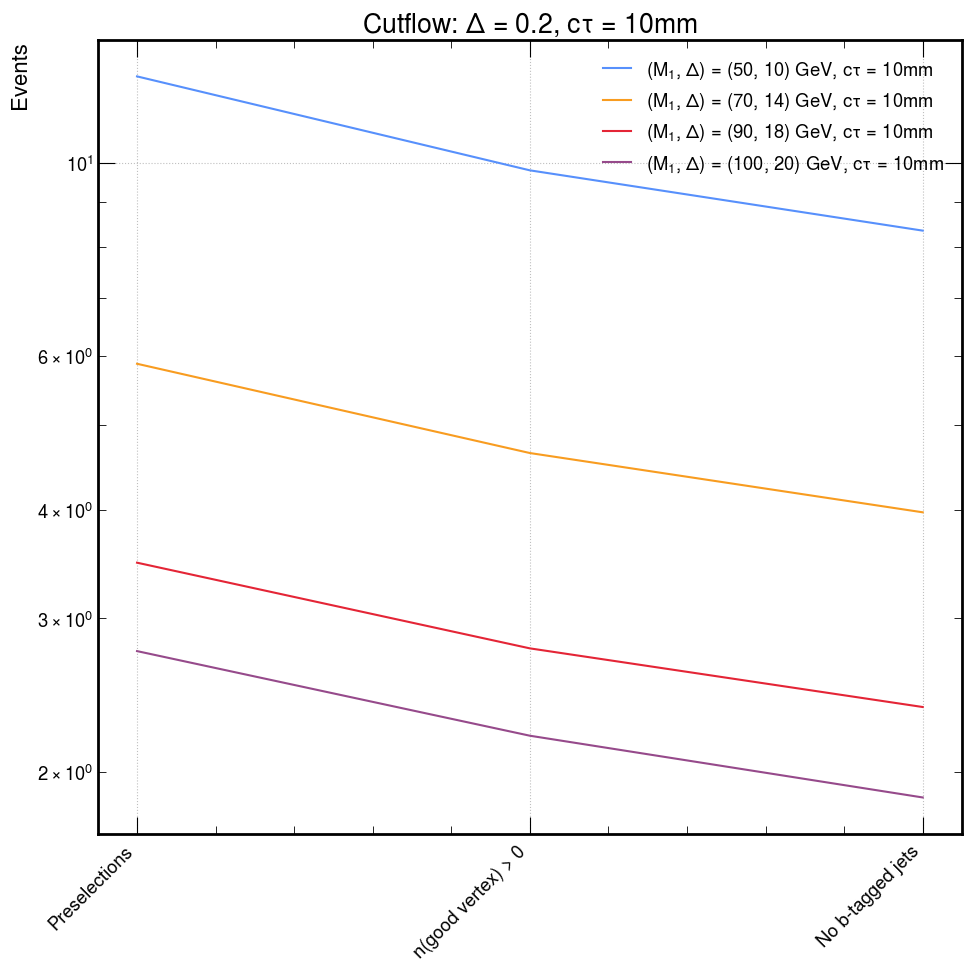

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_signal_delta_0p2_ct_100_m50to100.png


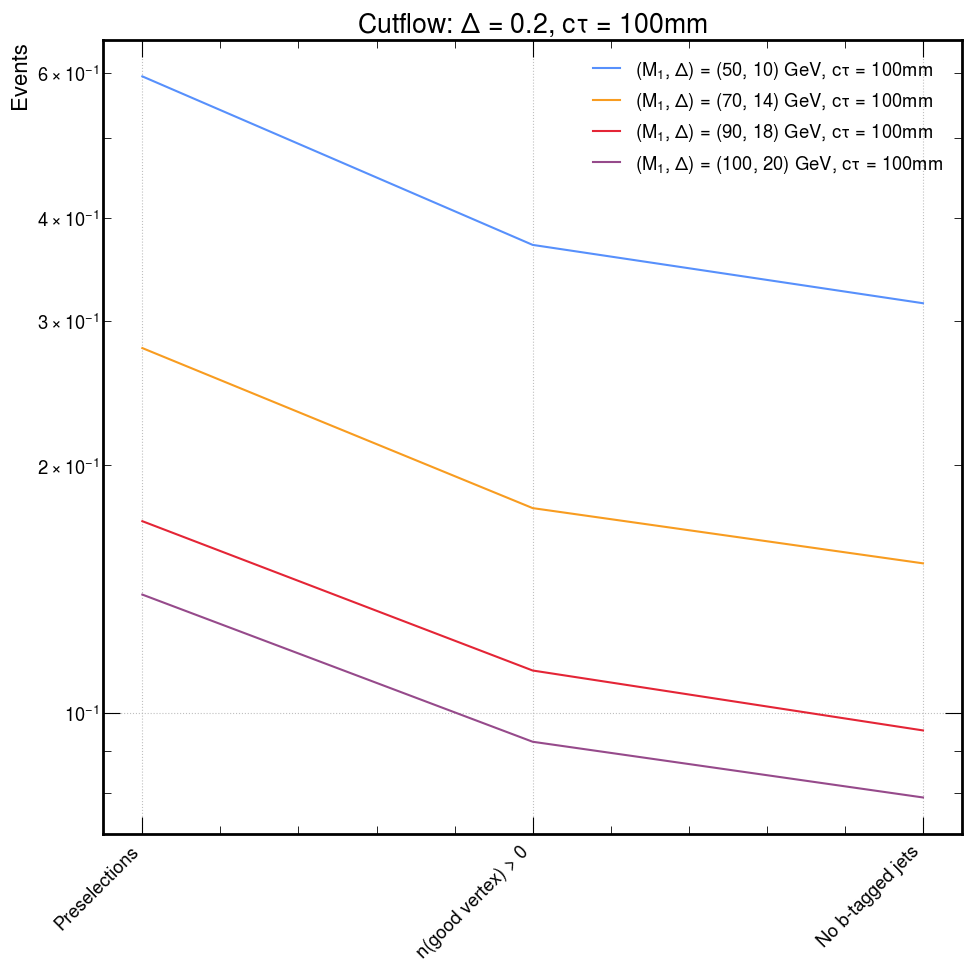

In [22]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [23]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets
TTbar,0.00041435,0.00005648,0.00003373
DY-M50,0.00037497,0.00011275,0.00008778
ZGamma,0.00031387,0.00008565,0.00006786
Multiboson,0.00062600,0.00017701,0.00013283
DY-M4to50,0.00002494,0.00000544,0.00000409
SingleTop,0.00022295,0.00006292,0.00004144
WJets,0.00096802,0.00028181,0.00022777
ZJets,0.00231871,0.00056936,0.00046604
QCD,0.00000217,0.00000012,0.00000007
TTX,0.00127165,0.00014259,0.00006932


In [24]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'Background_Efficiency_{suffix}'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//Background_Efficiency__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


In [25]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets
TTbar,"20,615.75","2,809.87","1,678.12"
DY-M50,"4,144.22","1,246.15",970.11
ZGamma,"1,609.71",439.24,348.03
Multiboson,"4,362.92","1,233.65",925.79
DY-M4to50,355.33,77.46,58.27
SingleTop,"3,467.54",978.63,644.54
WJets,"169,523.91","49,352.48","39,887.60"
ZJets,"49,623.76","12,185.13","9,973.99"
QCD,"46,583.80","2,626.95","1,440.90"
TTX,394.77,44.27,21.52


In [26]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted_{suffix}'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//Background_EventCount_Weighted__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


In [27]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets
TTbar,484904,68940,40838
DY-M50,254356,26751,17075
ZGamma,6251,1745,1350
Multiboson,23952,6050,4503
DY-M4to50,24340,2391,1660
SingleTop,43674,16044,10581
WJets,1118768,160259,120462
ZJets,709551,95174,74479
QCD,30275,734,285
TTX,130908,10422,5715


In [28]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw_{suffix}'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//Background_EventCount_Raw__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


In [29]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 55948.88


In [30]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['No b-tagged jets']).transpose(), pd.DataFrame(bkg_cts_raw_df['No b-tagged jets']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,TTbar,DY-M50,ZGamma,Multiboson,DY-M4to50,SingleTop,WJets,ZJets,QCD,TTX,Total
Weighted Counts,"1,678.12",970.11,348.03,925.79,58.27,644.54,"39,887.60","9,973.99","1,440.90",21.52,"55,948.88"
Raw Counts,"40,838.00","17,075.00","1,350.00","4,503.00","1,660.00","10,581.00","120,462.00","74,479.00",285.00,"5,715.00","276,948.00"


## Data

In [31]:
pd.options.display.float_format = '{:,.1f}'.format
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets
data_2018_Data_MET_UL18_MET_Run2018C,"68,834.0","21,984.0","13,549.0"
data_2018_Data_MET_UL18_MET_Run2018D,"304,561.0","93,155.0","59,299.0"
data_2018_Data_MET_UL18_MET_Run2018B,"60,605.0","20,231.0","12,026.0"
data_2018_Data_MET_UL18_MET_Run2018A,"119,182.0","40,832.0","23,536.0"
Total,"553,182.0","176,202.0","108,410.0"


In [32]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections        1.8
n(good vertex) > 0   2.5
No b-tagged jets     1.9
Name: Total, dtype: float64

In [33]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections        553,182.0
n(good vertex) > 0   176,202.0
No b-tagged jets     108,410.0
Name: Total, dtype: float64

In [34]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections        300,681.7
n(good vertex) > 0    70,993.8
No b-tagged jets      55,948.9
Name: Total, dtype: float64

/tmp/ipykernel_2217696/1295588061.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


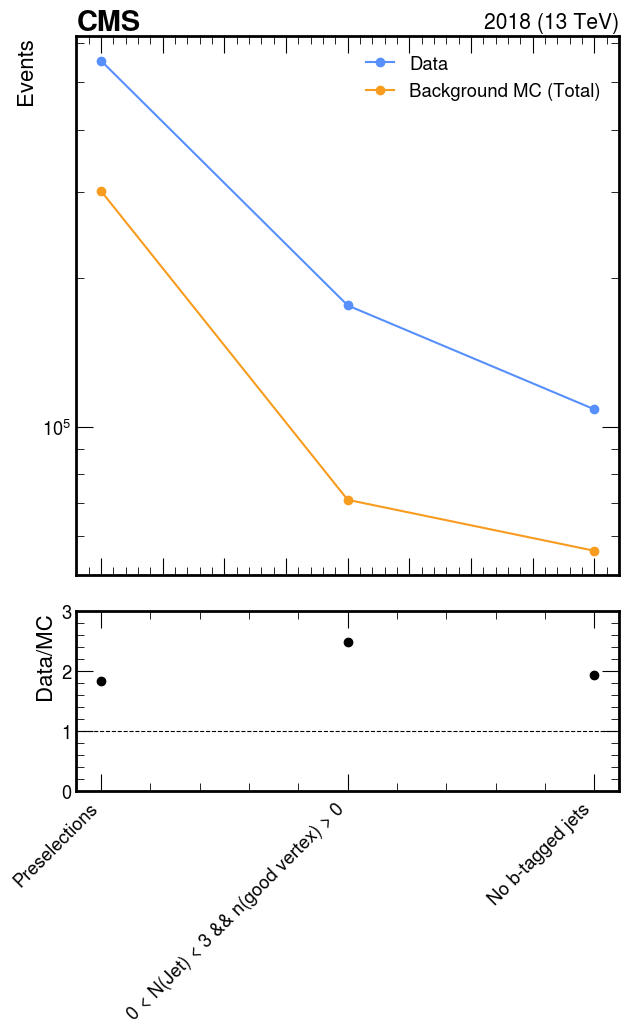

In [35]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')


plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,3])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_signal_list_of_cuts(sig_histo)
cuts[1] = '0 < N(Jet) < 3 && n(good vertex) > 0'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_background.png


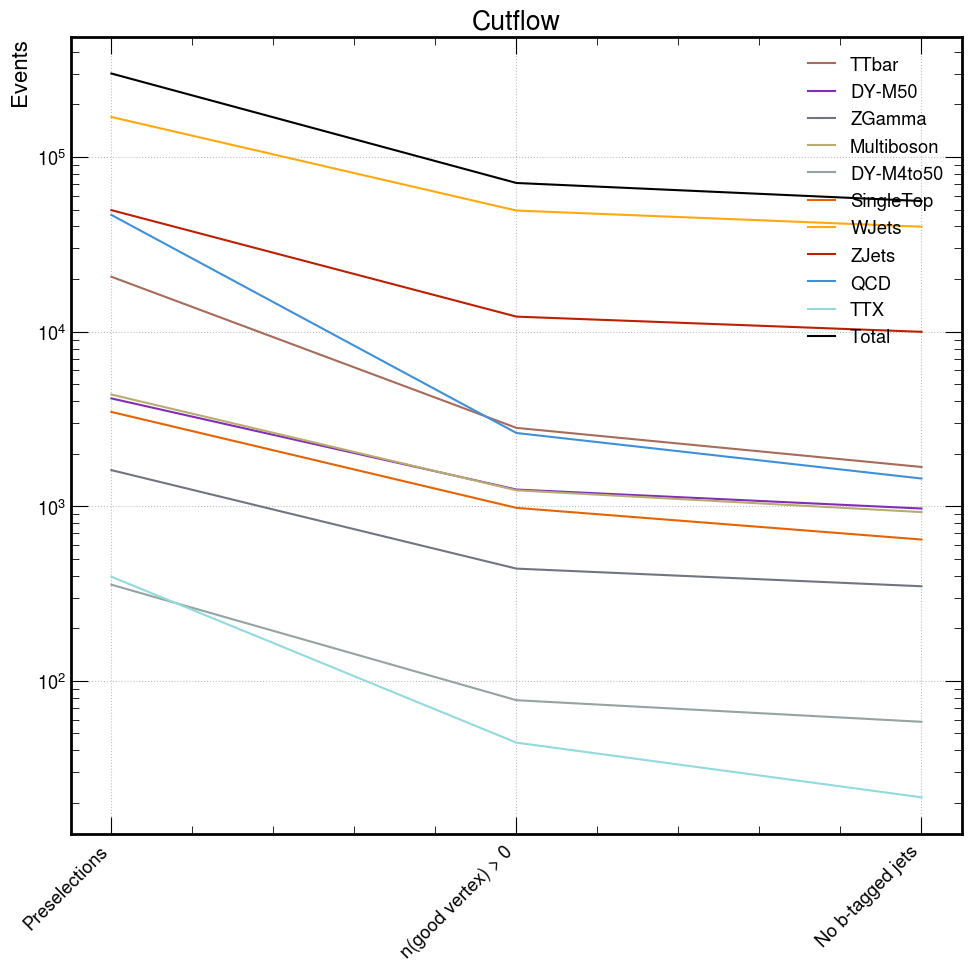

In [36]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': f'Cutflow_{suffix}_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [37]:
# S/sqrt(B) cutflow
pd.options.display.float_format = '{:,.5f}'.format
utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.00000,0.00000,0.00000
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.00002,0.00004,0.00005
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.00001,0.00004,0.00004
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.00015,0.00054,0.00059
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.00000,0.00000,0.00000
...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,0.07449,0.24944,0.27042
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,0.00545,0.01615,0.01758
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,0.00310,0.01134,0.01225
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.00001,0.00003,0.00004


Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p1_ct_1_m5to40.png


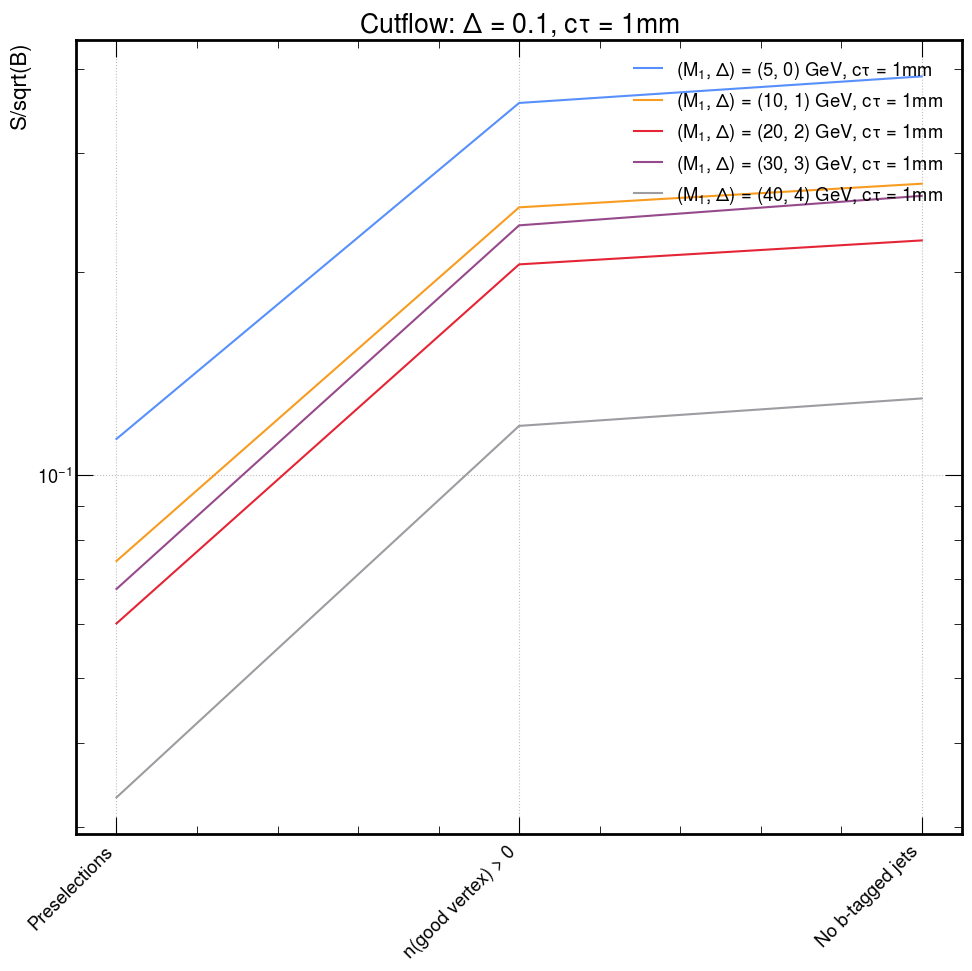

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p1_ct_10_m5to40.png


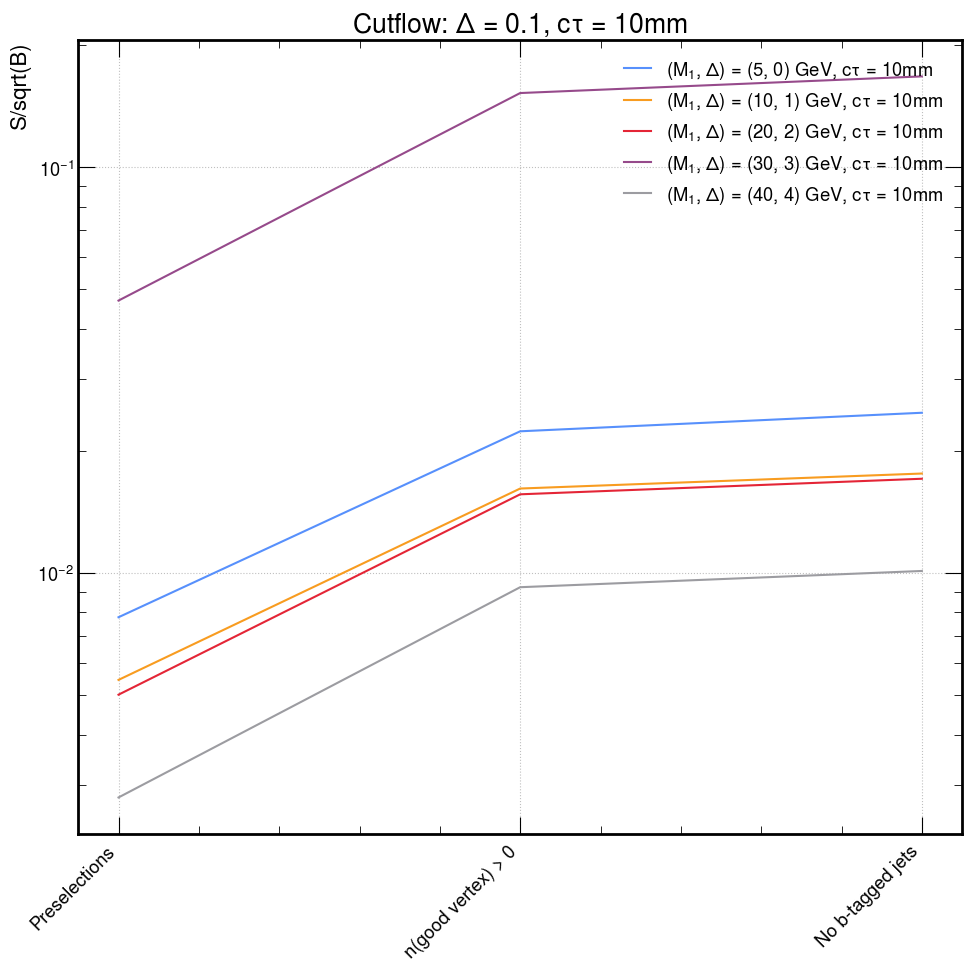

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p1_ct_100_m5to40.png


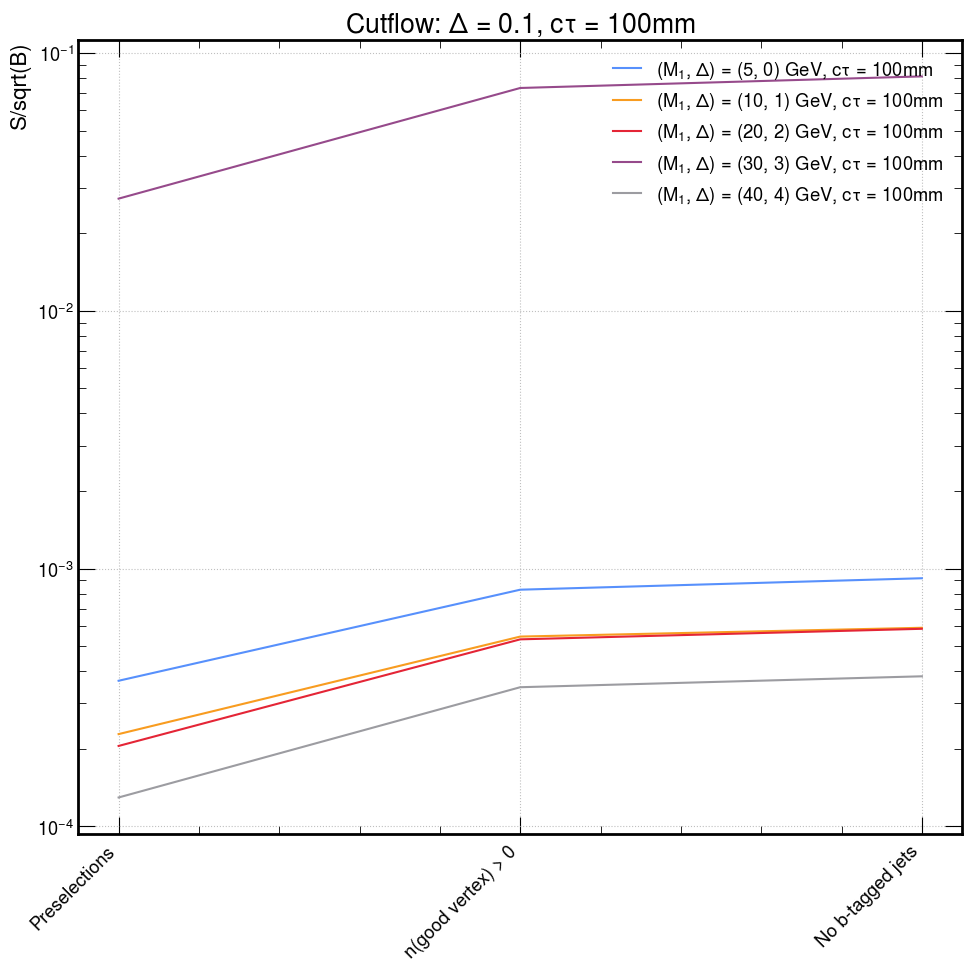

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p2_ct_1_m5to40.png


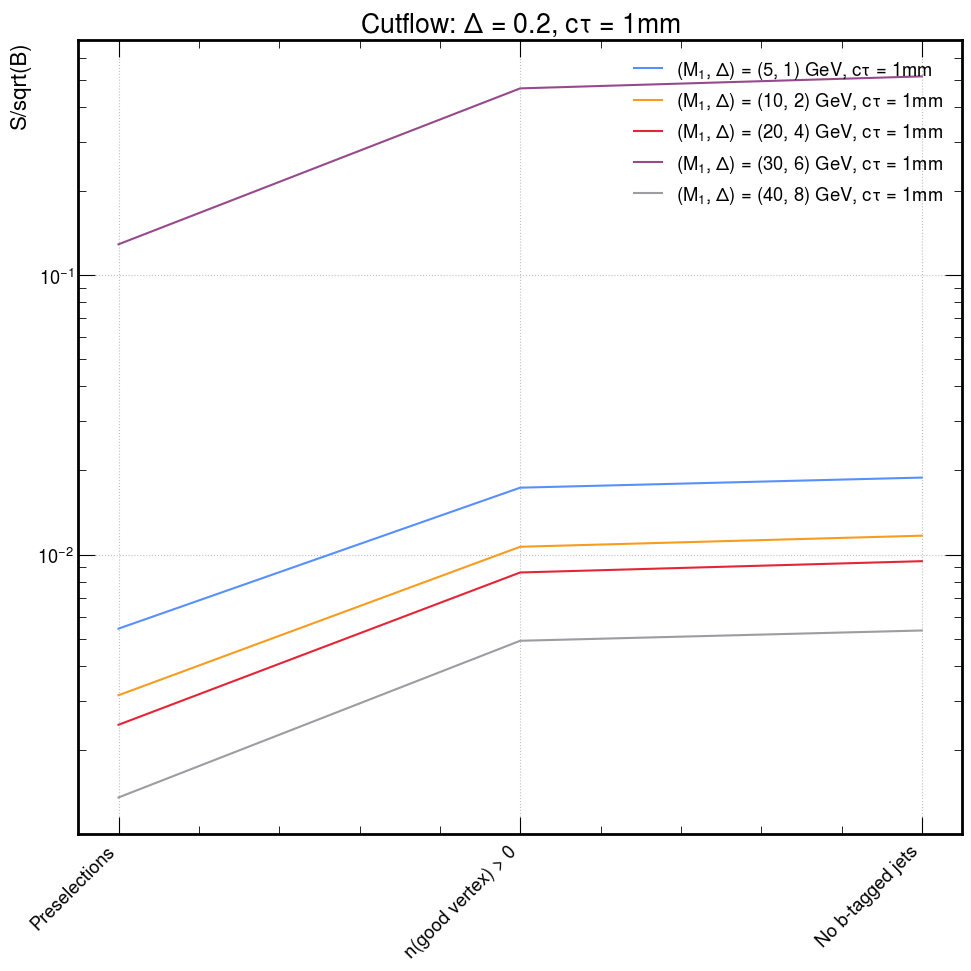

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p2_ct_10_m5to40.png


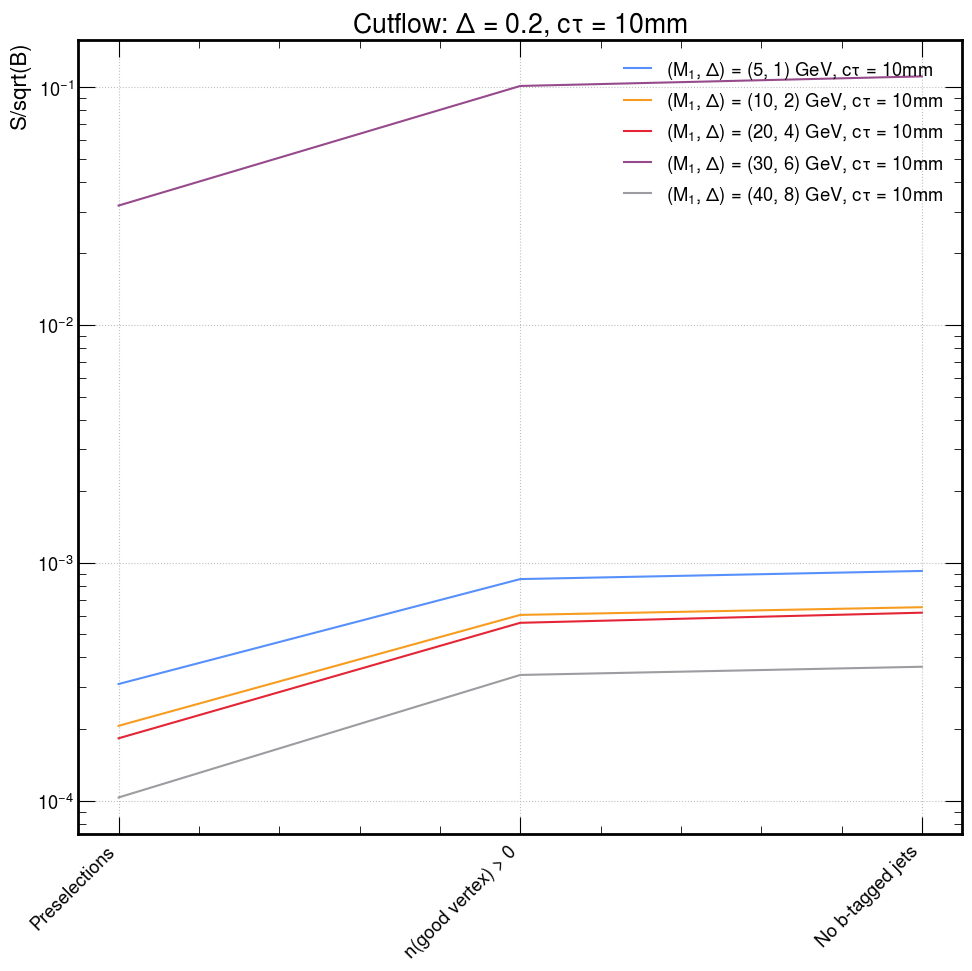

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p2_ct_100_m5to40.png


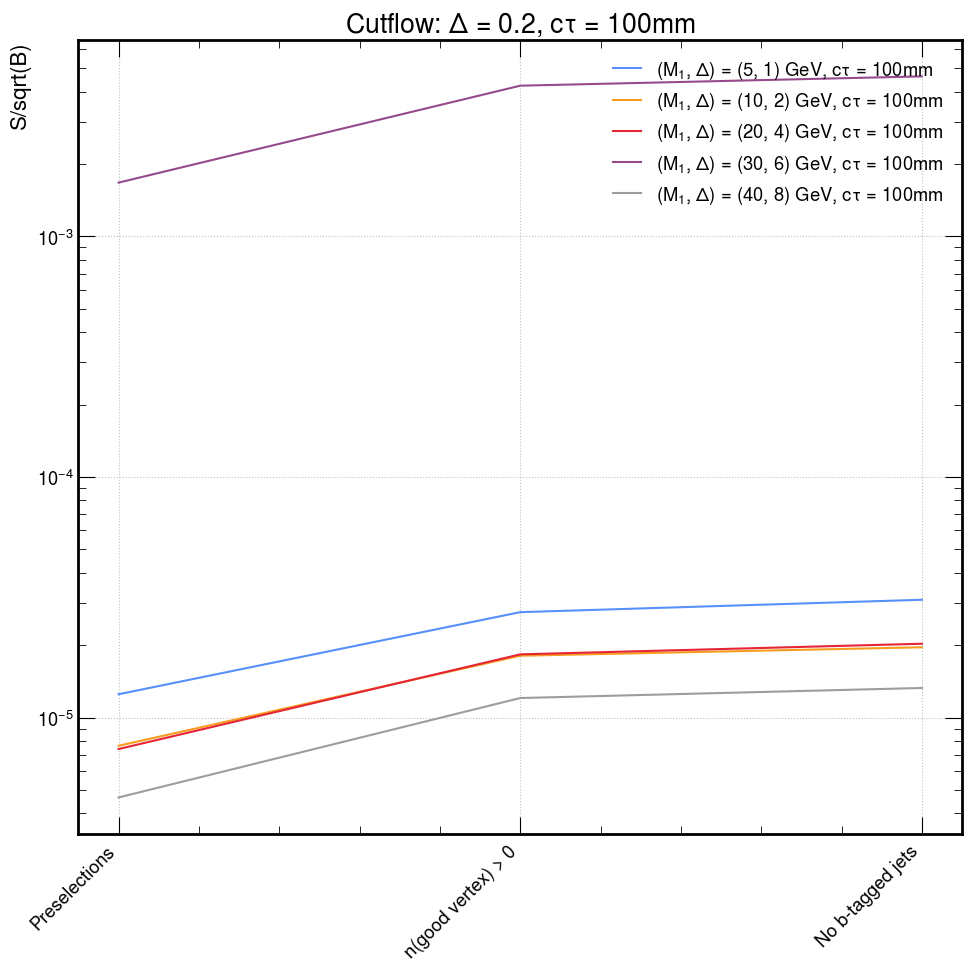

In [38]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p1_ct_1_m50to100.png


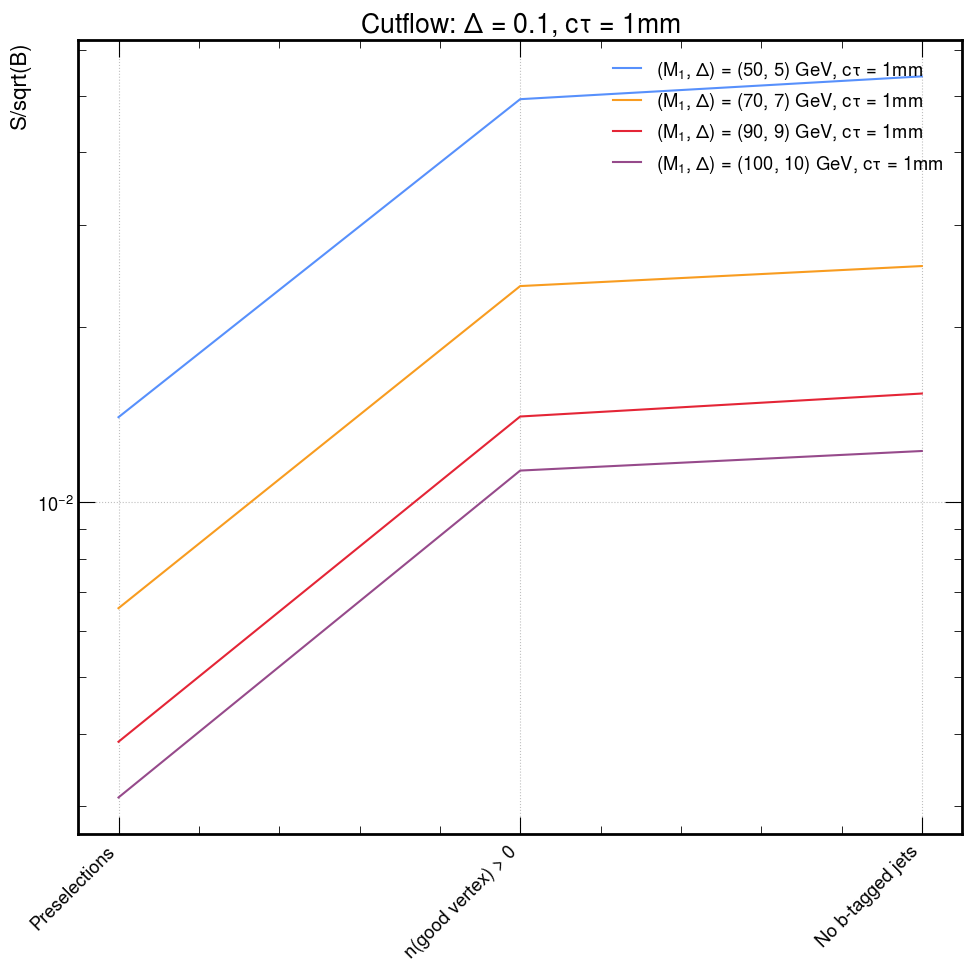

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p1_ct_10_m50to100.png


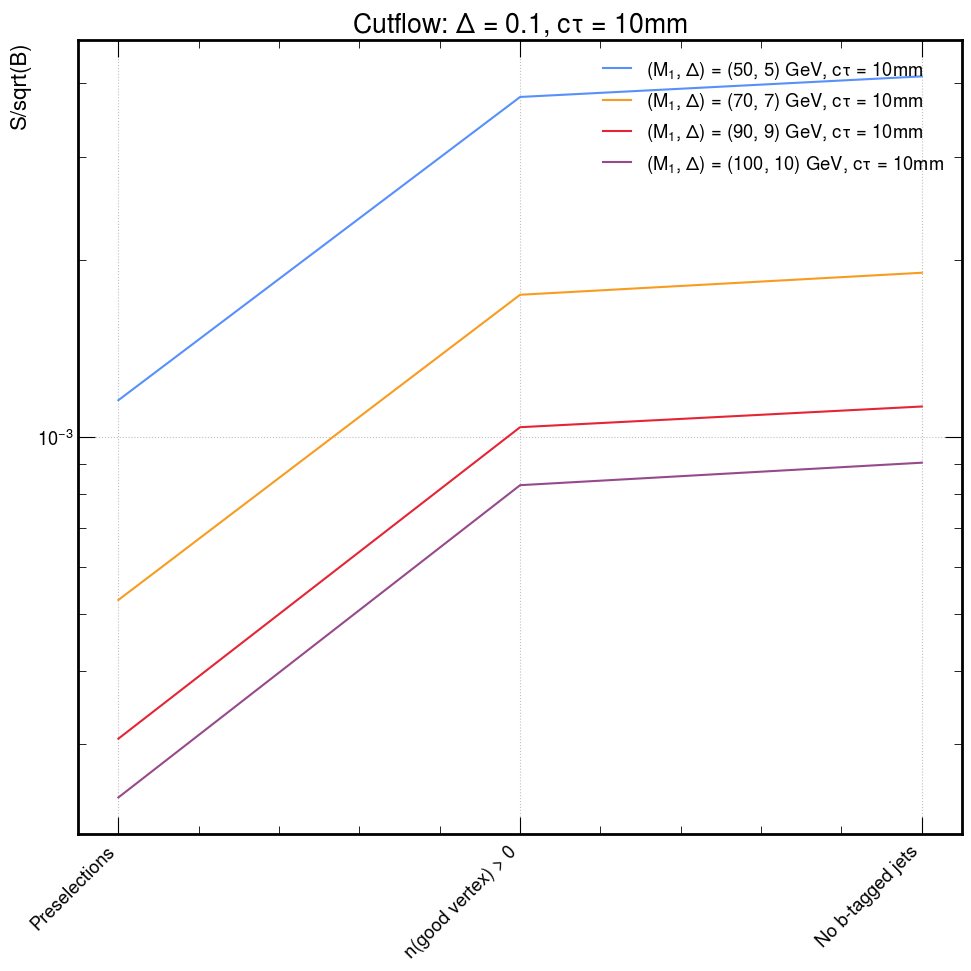

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p1_ct_100_m50to100.png


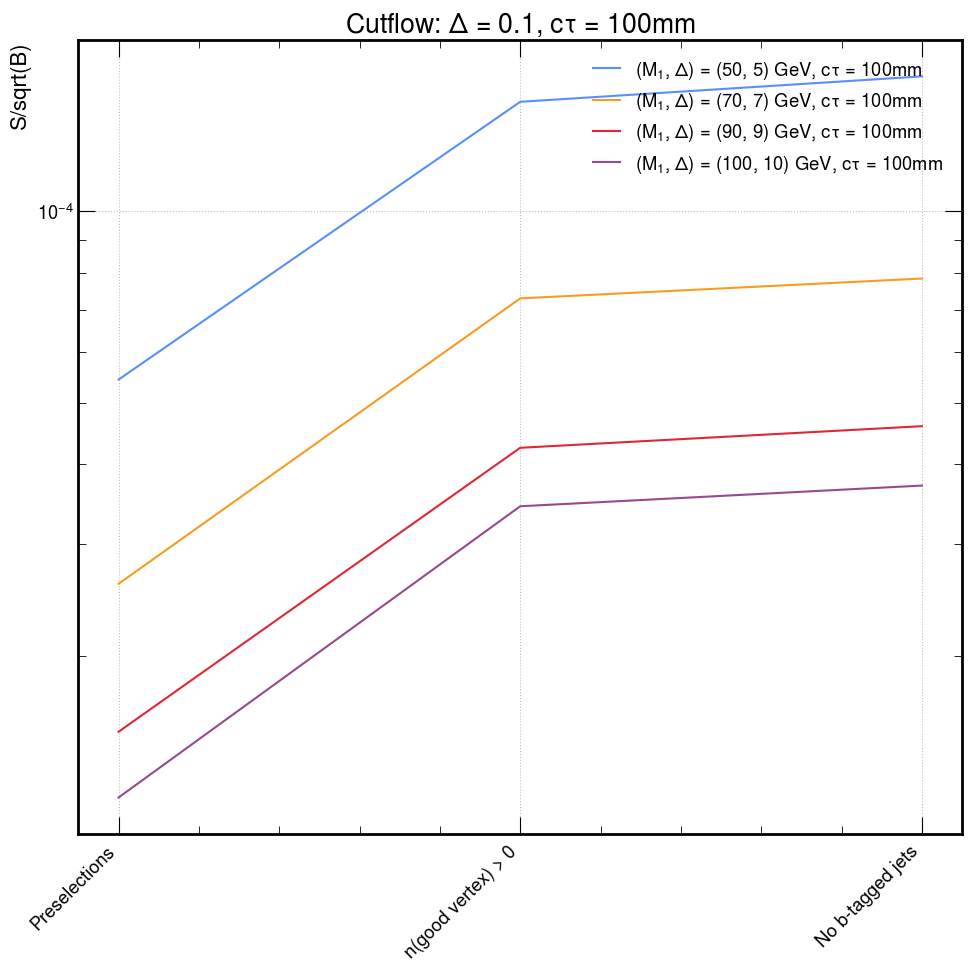

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p2_ct_1_m50to100.png


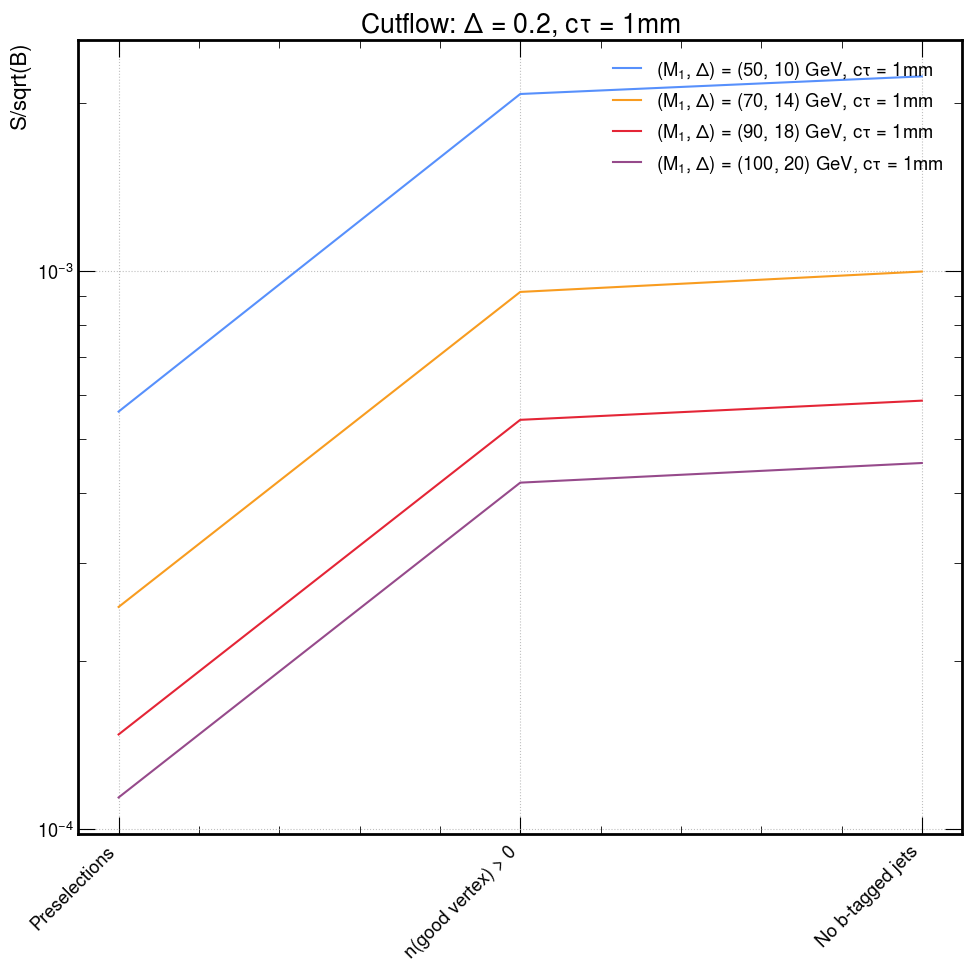

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p2_ct_10_m50to100.png


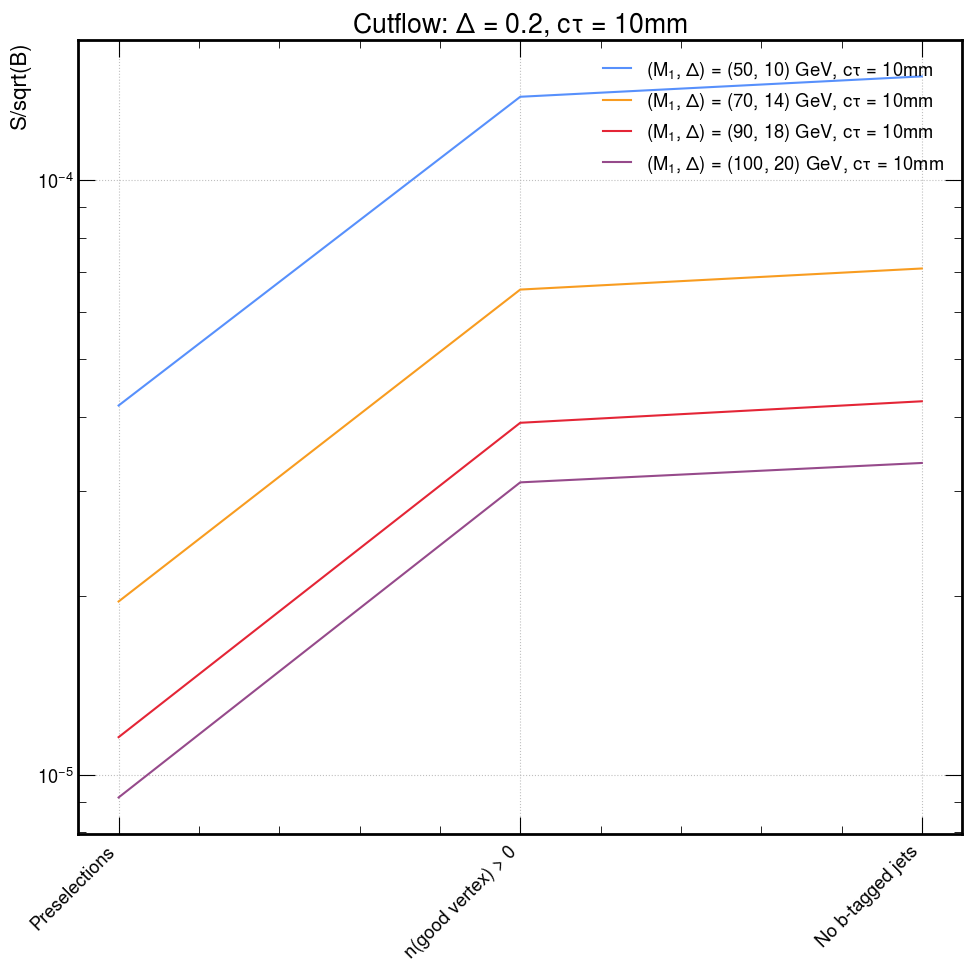

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3_s_over_b_delta_0p2_ct_100_m50to100.png


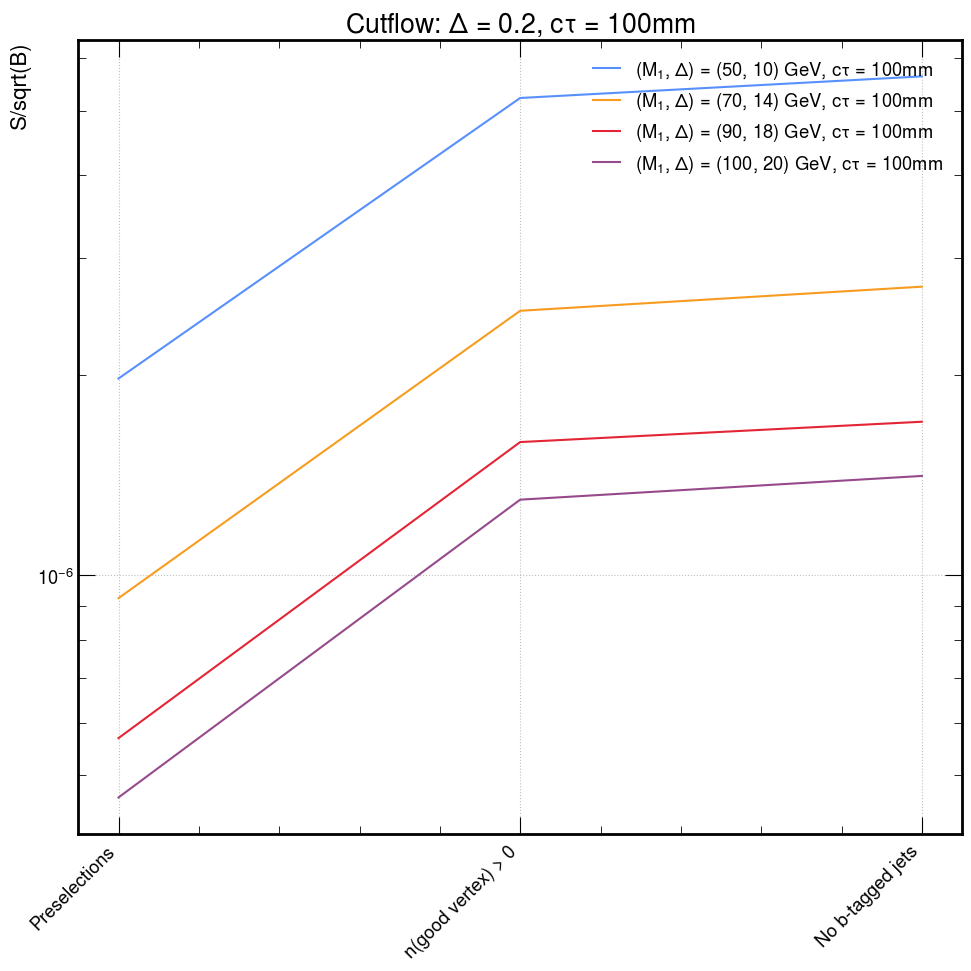

In [39]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

#### S/sqrt(B) at the end of the cutflow

In [40]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

55948.875804493306

In [41]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [42]:
pd.options.display.float_format = '{:,.4f}'.format

In [43]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,No b-tagged jets,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,"1,388.9029",5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"21,832.5300",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,51.3476,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,055.2759",5.0000,0.2000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,51.7149,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,1.8701,100.0000,0.2000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,25.3216,100.0000,0.2000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,685.5560,100.0000,0.1000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,2.0739,100.0000,0.1000,100.0000


In [44]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [45]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,"1,388.9029","55,948.8758",5.8719
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"21,832.5300","55,948.8758",92.3014
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,51.3476,"55,948.8758",0.2171
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,"1,055.2759","55,948.8758",4.4614
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,51.7149,"55,948.8758",0.2186
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,25.3216,"55,948.8758",0.1071
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,685.5560,"55,948.8758",2.8983
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,2.0739,"55,948.8758",0.0088
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,50.5669,"55,948.8758",0.2138


In [46]:
outdir = './csv/SR_Yields/'
outname = f'S_over_B_{suffix}'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//S_over_B__SRbeforeISRcuts_good_vtx_idOnly_NJetG0L3.csv


### ctau = 1mm

In [47]:
ct = 1.0

In [48]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"21,832.5300","55,948.8758",92.3014
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"15,129.6994","55,948.8758",63.9639
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"12,464.5949","55,948.8758",52.6966
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"14,514.8728","55,948.8758",61.3645
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"7,264.3620","55,948.8758",30.7116
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"3,024.9706","55,948.8758",12.7887
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,"1,981.4154","55,948.8758",8.3768
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,"1,426.6687","55,948.8758",6.0315
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,"1,080.7752","55,948.8758",4.5692
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,860.9083,"55,948.8758",3.6397


In [49]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,"1,055.2759","55,948.8758",4.4614
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,653.6639,"55,948.8758",2.7635
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,529.8273,"55,948.8758",2.2400
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"28,790.5559","55,948.8758",121.7179
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,299.2566,"55,948.8758",1.2652
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,124.8514,"55,948.8758",0.5278
62,60.0,0.2,1.0,0.0000,"55,948.8758",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,55.8034,"55,948.8758",0.2359
65,80.0,0.2,1.0,0.0000,"55,948.8758",0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,32.7525,"55,948.8758",0.1385


### ctau = 10mm

In [50]:
ct = 10.0

In [51]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,"1,388.9029","55,948.8758",5.8719
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,983.8449,"55,948.8758",4.1594
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,955.1542,"55,948.8758",4.0381
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"9,364.7930","55,948.8758",39.5915
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,566.0418,"55,948.8758",2.3931
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,229.8566,"55,948.8758",0.9718
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,144.8327,"55,948.8758",0.6123
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,106.4602,"55,948.8758",0.4501
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,81.1826,"55,948.8758",0.3432
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,63.0244,"55,948.8758",0.2664


In [52]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,51.7149,"55,948.8758",0.2186
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,36.4057,"55,948.8758",0.1539
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,34.5261,"55,948.8758",0.1460
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"6,211.0780","55,948.8758",26.2586
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,20.4534,"55,948.8758",0.0865
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,8.3541,"55,948.8758",0.0353
63,60.0,0.2,10.0,0.0000,"55,948.8758",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,3.9708,"55,948.8758",0.0168
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,2.9583,"55,948.8758",0.0125
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,2.3746,"55,948.8758",0.0100


### ctau = 100mm

In [53]:
ct = 100.0

In [54]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,51.3476,"55,948.8758",0.2171
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,32.9887,"55,948.8758",0.1395
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,32.6911,"55,948.8758",0.1382
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"4,543.7955","55,948.8758",19.2098
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,21.3858,"55,948.8758",0.0904
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,9.0886,"55,948.8758",0.0384
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,5.9803,"55,948.8758",0.0253
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,4.3799,"55,948.8758",0.0185
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,3.2871,"55,948.8758",0.0139
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,2.5698,"55,948.8758",0.0109


In [55]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,1.7279,"55,948.8758",0.0073
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,1.0966,"55,948.8758",0.0046
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,1.1344,"55,948.8758",0.0048
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,258.8272,"55,948.8758",1.0942
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.7428,"55,948.8758",0.0031
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.3150,"55,948.8758",0.0013
64,60.0,0.2,100.0,0.0000,"55,948.8758",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.1520,"55,948.8758",0.0006
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.1226,"55,948.8758",0.0005
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0952,"55,948.8758",0.0004
